# EBAC- Módulo 16 - Métodos de análise

##  <span style="color:purple">Etapa 1 CRISP - DM: Entendimento do negócio

 ##### 1. Objetivo Principal 
- O objetivo é entender quais fatores influenciam a renda das pessoas e criar um modelo preditivo confiável.
- Alguns exemplos de padrões que podem ser investigados:- Relação entre nível de escolaridade e renda.
- Diferenças de renda por região geográfica.
- Impacto de idade ou tempo de experiência na renda .


##### 2. Perguntas que Guiarão a  Análise
- Quais variáveis mais influenciam a renda?
- Existe alguma tendência clara entre grupos específicos (ex.: gênero, ocupação, região)?
- Podemos criar um modelo para prever a renda de uma pessoa com base nos dados disponíveis?

##### 3. Conhecimento dos Stakeholders
- Para quem esses resultados serão úteis? Você está desenvolvendo isso para fins acadêmicos, corporativos ou outro propósito?
- Quais decisões poderiam ser tomadas com base nos padrões identificados ou no mod_el o preditivo?

##### 4. Critérios de Sucesso
- Critério técnico: Qual é o nível aceitável de precisão para o modelo? Por exemplo, você espera uma margem de erro de até 10%?
- Critério de negócio: Os resultados precisam ser interpretáveis e aplicáveis no mundo real. Por exemplo, um padrão identificado precisa ser útil para to mada de decisão.

##### 5. Restrições e Premissas
- Há dados suficientes e de boa qualidade para atingir o objetivo?
- Existem restrições de tempo ou recursos para o desen do projeto?


</span>


## <span style="color:purple"> Etapa 2 Crisp-DM: Entendimento dos dados</span>

### <span style="color:blue"> Dicionário de dados </span>

| Variável                | Descrição                                           | Tipo         |
|------------------------|-----------------------------------------------------|--------------|
| `data_ref`             | Data de referência da coleta dos dados              | `datetime`   |
| `id_cliente`           | Identificador único do cliente                      | `int` ou `string` |
| `sexo`                 | Sexo do cliente (Masculino/Feminino)                | `string`     |
| `posse_de_veiculo`     | Cliente possui veículo?                             | `bool` ou `string` |
| `posse_de_imovel`      | Cliente possui imóvel?                              | `bool` ou `string` |
| `qtd_filhos`           | Quantidade de filhos do cliente                     | `int`        |
| `tipo_renda`           | Tipo de fonte de renda do cliente                   | `string`     |
| `educacao`             | Grau de instrução do cliente                        | `string`     |
| `estado_civil`         | Estado civil do cliente                             | `string`     |
| `tipo_residencia`      | Tipo de residência do cliente                       | `string`     |
| `idade`                | Idade do cliente                                    | `int`        |
| `tempo_emprego`        | Tempo (em anos) no emprego atual                    | `float`      |
| `qt_pessoas_residencia`| Quantas pessoas vivem com o cliente                 | `int`        |
| `renda`                | Renda mensal do cliente                             | float`      |





#### <span style="color:purple"> Carregando os pacotes </span>
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [1]:
#Importando as biblotecas relevantes
import pandas as pd
import numpy as np
import os
import seaborn as sns


import matplotlib.pyplot as plt
import ydata_profiling
from ydata_profiling import ProfileReport
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
# Vamos carregar os dados a ser analisados
df = pd.read_csv('./input/previsao_de_renda.csv') 
print ("Número de linhas e colunas da tabela: {}".format(df.shape))
df.head(1)


Número de linhas e colunas da tabela: (15000, 15)


,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.60274,1.0,8060.34


In [3]:
# Removendo as coluna indesejáveis e resetando o índice
df.drop(columns=['Unnamed: 0', 'id_cliente'], inplace=True)
df.set_index('data_ref', inplace=True)

df.head(2)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,
2015-01-01,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
2015-01-01,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15


In [4]:
# Gerando relatório de perfilamento automático
prof = ProfileReport(df, explorative=True, minimal=True)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 80.74it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

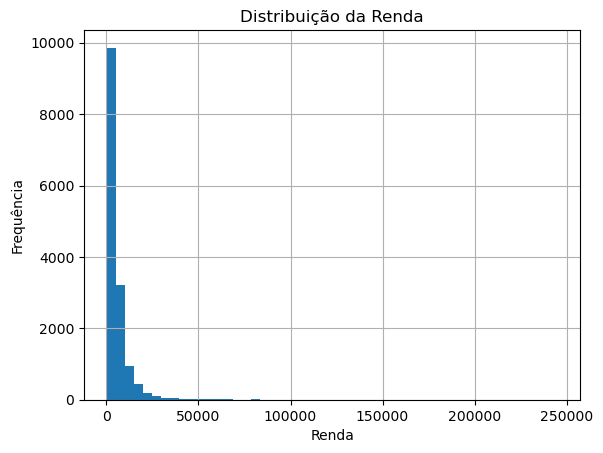

In [6]:
# Histograma da renda
df['renda'].hist(bins=50)           
plt.title("Distribuição da Renda")
plt.xlabel("Renda")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()

In [7]:
# Resumo estatístico
df['renda'].describe()      

count     15000.000000
mean       5697.287057
std        8266.816289
min         118.710000
25%        2026.110000
50%        3499.720000
75%        6392.167500
max      245141.670000
Name: renda, dtype: float64

### Entendimento dos dados - Bivariadas

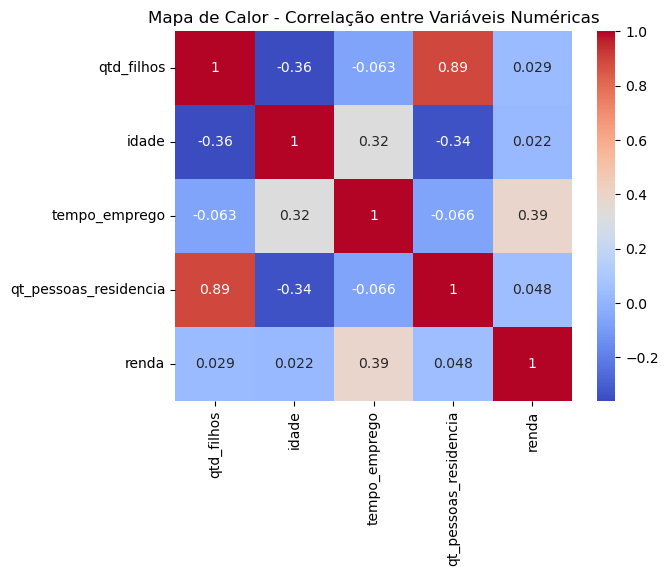

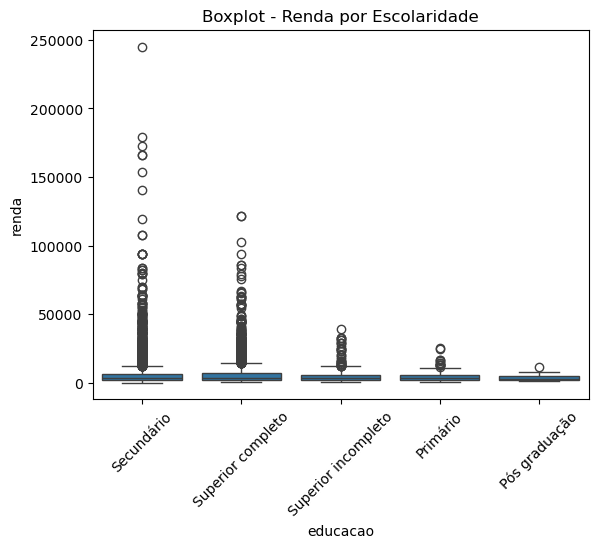

In [8]:
# Selecionar apenas colunas numéricas
numericas = df.select_dtypes(include='number')

# Correlação entre variáveis numéricas
sns.heatmap(numericas.corr(), annot=True, cmap='coolwarm')
plt.title("Mapa de Calor - Correlação entre Variáveis Numéricas")
plt.show()

# Renda por escolaridade
sns.boxplot(data=df, x='educacao', y='renda')
plt.xticks(rotation=45)
plt.title("Boxplot - Renda por Escolaridade")
plt.show()

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
qtd_filhos,15000.0,0.432333,0.746631,0.000000,0.000000,0.000000,1.000000,14.000000
idade,15000.0,43.882333,11.273155,22.000000,34.000000,43.000000,53.000000,68.000000
tempo_emprego,12427.0,7.722635,6.711189,0.117808,2.973973,6.013699,10.120548,42.906849
qt_pessoas_residencia,15000.0,2.206400,0.909792,1.000000,2.000000,2.000000,3.000000,15.000000
renda,15000.0,5697.287057,8266.816289,118.710000,2026.110000,3499.720000,6392.167500,245141.670000


## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?


In [10]:
# Verificar dados ausentes
df['tempo_emprego'].isnull().sum()

# Preencher com a mediana
df['tempo_emprego'] = df['tempo_emprego'].fillna(df['tempo_emprego'].median())


# Criar uma variável binária
df['tem_filhos'] = df['qtd_filhos'].apply(lambda x: 0 if x == 0 else 1)

df.head(2)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,tem_filhos
data_ref,,,,,,,,,,,,,
2015-01-01,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34,0
2015-01-01,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15,0


In [11]:
# Tratar dados ausentes
df.bfill(inplace=True)

In [12]:
# Converter categorias para números (ex: one-hot encoding ou label encoding)
df = pd.get_dummies(df, drop_first=True)


In [13]:
df.dtypes

posse_de_veiculo                    bool
posse_de_imovel                     bool
qtd_filhos                         int64
idade                              int64
tempo_emprego                    float64
qt_pessoas_residencia            float64
renda                            float64
tem_filhos                         int64
sexo_M                              bool
tipo_renda_Bolsista                 bool
tipo_renda_Empresário               bool
tipo_renda_Pensionista              bool
tipo_renda_Servidor público         bool
educacao_Pós graduação              bool
educacao_Secundário                 bool
educacao_Superior completo          bool
educacao_Superior incompleto        bool
estado_civil_Separado               bool
estado_civil_Solteiro               bool
estado_civil_União                  bool
estado_civil_Viúvo                  bool
tipo_residencia_Casa                bool
tipo_residencia_Com os pais         bool
tipo_residencia_Comunitário         bool
tipo_residencia_

## Etapa 4 Crisp-DM: Modelagem
#### <span style="color:purple"> Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo

### Rodando o modelo

In [20]:
# Separar X e y
X = df.drop(columns=['renda'])
y = df['renda']

# Treinar/testar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regressão linear
modelo1 = LinearRegression()
modelo1.fit(X_train, y_train)


LinearRegression()

In [15]:
y_pred = modelo1.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 34495058.06547607
R²: 0.2960205233510519


In [16]:
# Modelo Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("[Ridge] MSE:", mean_squared_error(y_test, y_pred_ridge))
print("[Ridge] R²:", r2_score(y_test, y_pred_ridge))

[Ridge] MSE: 34494336.99809566
[Ridge] R²: 0.29603523898469786


In [17]:
# Modelo Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print("[Lasso] MSE:", mean_squared_error(y_test, y_pred_lasso))
print("[Lasso] R²:", r2_score(y_test, y_pred_lasso))


[Lasso] MSE: 34488711.031512775
[Lasso] R²: 0.2961500544171911


## Etapa 5 Crisp-DM: Avaliação dos resultados


#### <span style="color:purple"> Interpretação dos Resultados
Performance Muito Similar entre os Modelos:

Os valores de MSE e R² são quase idênticos nos três modelos.

Isso indica que o impacto da regularização (Ridge e Lasso) foi mínimo, ou seja, os dados não estavam sofrendo muito com overfitting/outliers multicolineares.

R² ~ 0.296 → Baixa Capacidade de Explicação

Os modelos conseguem explicar apenas cerca de 29,6% da variabilidade da variável 'renda'.

Isso é um sinal claro de que:

Os dados disponíveis não têm muitos preditores fortes para a renda.

Pode haver variáveis importantes faltando (por exemplo: ocupação, setor, região, escolaridade).

Pode haver não-linearidades que um modelo linear não está capturando bem.

MSE elevado

Os erros quadráticos médios estão em torno de 34 milhões, o que é alto (assumindo que os valores de renda estejam em uma escala realista). Isso reforça que o modelo não está prevendo com muita precisão.

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

A implantação deste modelo será feita em um arquivo .py, para ser rodado no streamlit.